# Bigram LM makemore

Implelement the bigram LM developed by Karpathy in [makemore pt.1](https://www.youtube.com/watch?v=PaCmpygFfXo&list=PLAqhIrjkxbuWI23v9cThsA9GvCAUhRvKZ&index=2&ab_channel=AndrejKarpathy)

## Step 1:

Read names.txt and create bigram. Crete the counts matrix

In [1]:
with open('names.txt', 'r') as file:
    lines = file.read().splitlines()

line_count = len(lines)
print(f"Number of names: {line_count}")

Number of names: 32033


In [2]:
import numpy as np

with open('names.txt', 'r') as file:
    name_lengths = [len(name) for name in file]

name_lengths = np.array(name_lengths)

# Minimum value
min_value = np.min(name_lengths)

# Maximum value
max_value = np.max(name_lengths)

# Average (mean)
average = np.mean(name_lengths)

# Percentiles (e.g., 25th, 50th (median), and 75th percentiles)
percentile_25 = np.percentile(name_lengths, 25)
percentile_50 = np.percentile(name_lengths, 50)  # This is the median
percentile_75 = np.percentile(name_lengths, 75)

# Print results
print(f"Minimum: {min_value}")
print(f"Maximum: {max_value}")
print(f"Average: {average}")
print(f"25th Percentile: {percentile_25}")
print(f"50th Percentile (Median): {percentile_50}")
print(f"75th Percentile: {percentile_75}")

Minimum: 3
Maximum: 16
Average: 7.122186495176849
25th Percentile: 6.0
50th Percentile (Median): 7.0
75th Percentile: 8.0


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

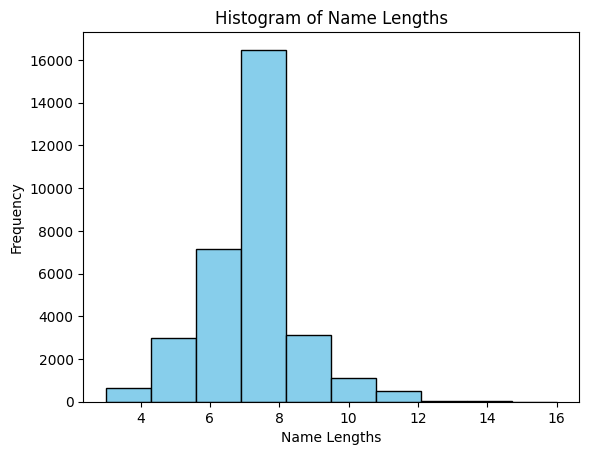

In [5]:
# Plotting the histogram
plt.hist(name_lengths, bins=10, color='skyblue', edgecolor='black')

# Adding labels and title
plt.title("Histogram of Name Lengths")
plt.xlabel("Name Lengths")
plt.ylabel("Frequency")

# Show the plot
plt.show()

### Create the bigrams from each name

**Method 1** : Use separate tokens for start and end as \<s\> and \<e\>

In [7]:
with open('names.txt', 'r') as file:
    names = file.read().splitlines()

len(names)

32033

In [8]:
for name in names[:3]:
    for char1, char2 in zip(name, name[1:]):
        print(char1, char2)

e m
m m
m a
o l
l i
i v
v i
i a
a v
v a


Add start and end tokens

In [11]:
for name in names[:1]:
    name = ["<s>"] + list(name) + ["<e>"]
    for char1, char2 in zip(name, name[1:]):
        print(char1, char2)

<s> e
e m
m m
m a
a <e>


Maintain dict with the counts

In [12]:
bigram_freq = {}

for name in names:
    name = ["<s>"] + list(name) + ["<e>"]
    for char1, char2 in zip(name, name[1:]):
        bigram = (char1, char2)
        bigram_freq[bigram] = bigram_freq.get(bigram, 0) + 1

In [13]:
bigram_freq[('s', 'o')]

531

In [14]:
sorted(bigram_freq.items(), key=lambda kv: -kv[1])

[(('n', '<e>'), 6763),
 (('a', '<e>'), 6640),
 (('a', 'n'), 5438),
 (('<s>', 'a'), 4410),
 (('e', '<e>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<s>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<s>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<e>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<s>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<e>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<s>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<e>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<s>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<s>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<s>', 'l'), 1572),
 (('<s>', 'c'), 1542),
 (('<s>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

Save these counts in a torch Tensor (basic "model" with just the hard coded probabilities from the data)

In [22]:
stoi, itos = {}, {}

stoi['<s>'] = 0
itos[0] = '<s>'

chars = sorted(list(set([ch for name in names for ch in name])))

for i, char in enumerate(chars):
    stoi[char] = i + 1
    itos[i + 1] = char

stoi['<e>'] = 27
itos[27] = '<e>'

In [23]:
stoi

{'<s>': 0,
 'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '<e>': 27}

In [24]:
itos

{0: '<s>',
 1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 27: '<e>'}

In [25]:
len(bigram_freq)

627

In [42]:
import torch

model1 = torch.ones((28, 28), dtype=torch.int32)

for bigram, freq in bigram_freq.items():
    char1, char2 = bigram
    i1, i2 = stoi[char1], stoi[char2]
    model1[i1][i2] += freq

In [43]:
model1[0,:]

tensor([   1, 4411, 1307, 1543, 1691, 1532,  418,  670,  875,  592, 2423, 2964,
        1573, 2539, 1147,  395,  516,   93, 1640, 2056, 1309,   79,  377,  308,
         135,  536,  930,    1], dtype=torch.int32)

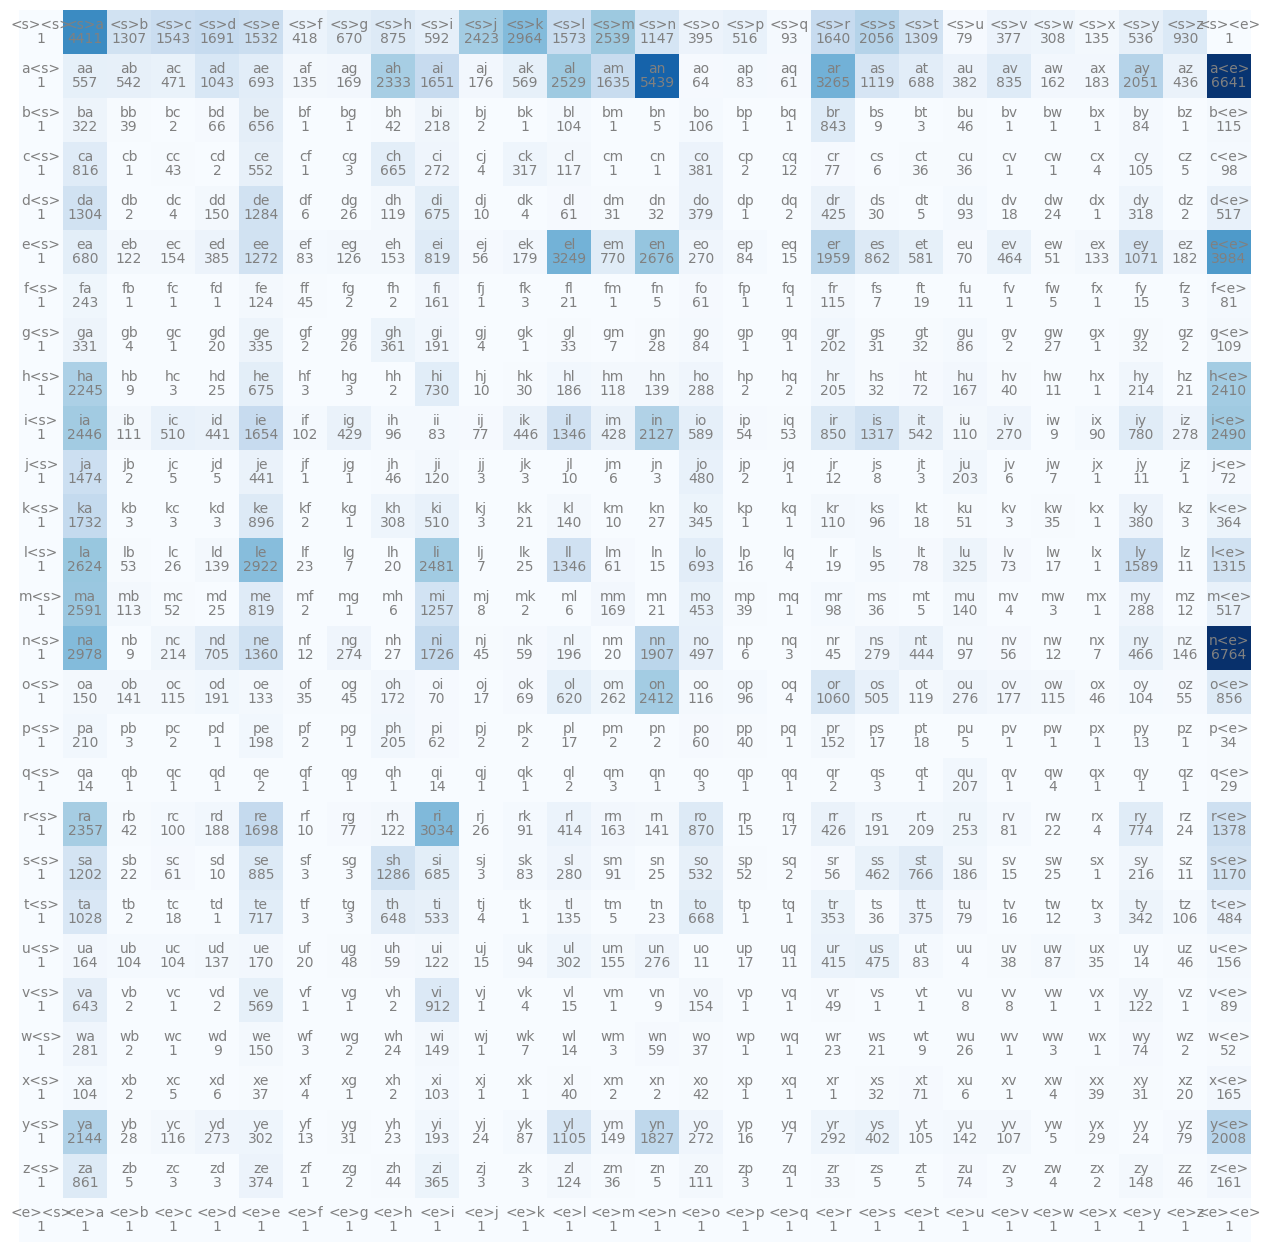

In [44]:
plt.figure(figsize=(16,16))
plt.imshow(model1, cmap='Blues')
for i in range(28):
    for j in range(28):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, model1[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

### Sampling from this distribution

- Set a torch seed.
- Set the first character as \<s\>
- Create a multinomial distribution from this array based on the character
- Sample a idx from here based on that dist.
- If we hit \<e\>, stop. 
- Else replace the first character with this newly sampled character and repeat sampling

In [ ]:
## 28 * 28 
## [ins]1   * 28

## When doing a/a.sum(dim=1); it will broadcast the 28 sized array to 1*28 which basically a col vector
#  Then it will copy each value in the column to 28 rows.
# So for correct answer, need to keepdim = True

In [60]:
model1.sum(dim=1, keepdim=True).shape

torch.Size([28, 1])

In [61]:
model1 = model1/model1.sum(dim=1, keepdim=True)

In [63]:
model1[8,:].sum()

tensor(1.)

In [66]:
model1[8,:].shape

torch.Size([28])

In [72]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5): #Lets sample 5 names
    curr_char, curr_name = "<s>", ""

    while True:
        curr_idx = stoi[curr_char]
        sample_idx = torch.multinomial(model1[curr_idx,:], num_samples=1, replacement=True, generator=g).item()
        sample_char = itos[sample_idx]

        if sample_char == "<e>":
            break
        curr_name += sample_char
        curr_char = sample_char

    print(curr_name)

ca
wia
heaijowya
iane
azon


**Method 2** : Use the "." token for both start and end

In [73]:
stoi, itos = {}, {}

stoi['.'] = 0
itos[0] = '.'

chars = sorted(list(set([ch for name in names for ch in name])))

for i, char in enumerate(chars):
    stoi[char] = i + 1
    itos[i + 1] = char

In [74]:
len(names)

32033

In [92]:
model2 = torch.zeros((27, 27), dtype=torch.int32)

for name in names:
    name = ['.'] + list(name) + ['.']

    for ch1, ch2 in zip(name, name[1:]):
        i1, i2 = stoi[ch1], stoi[ch2]
        model2[i1][i2] += 1


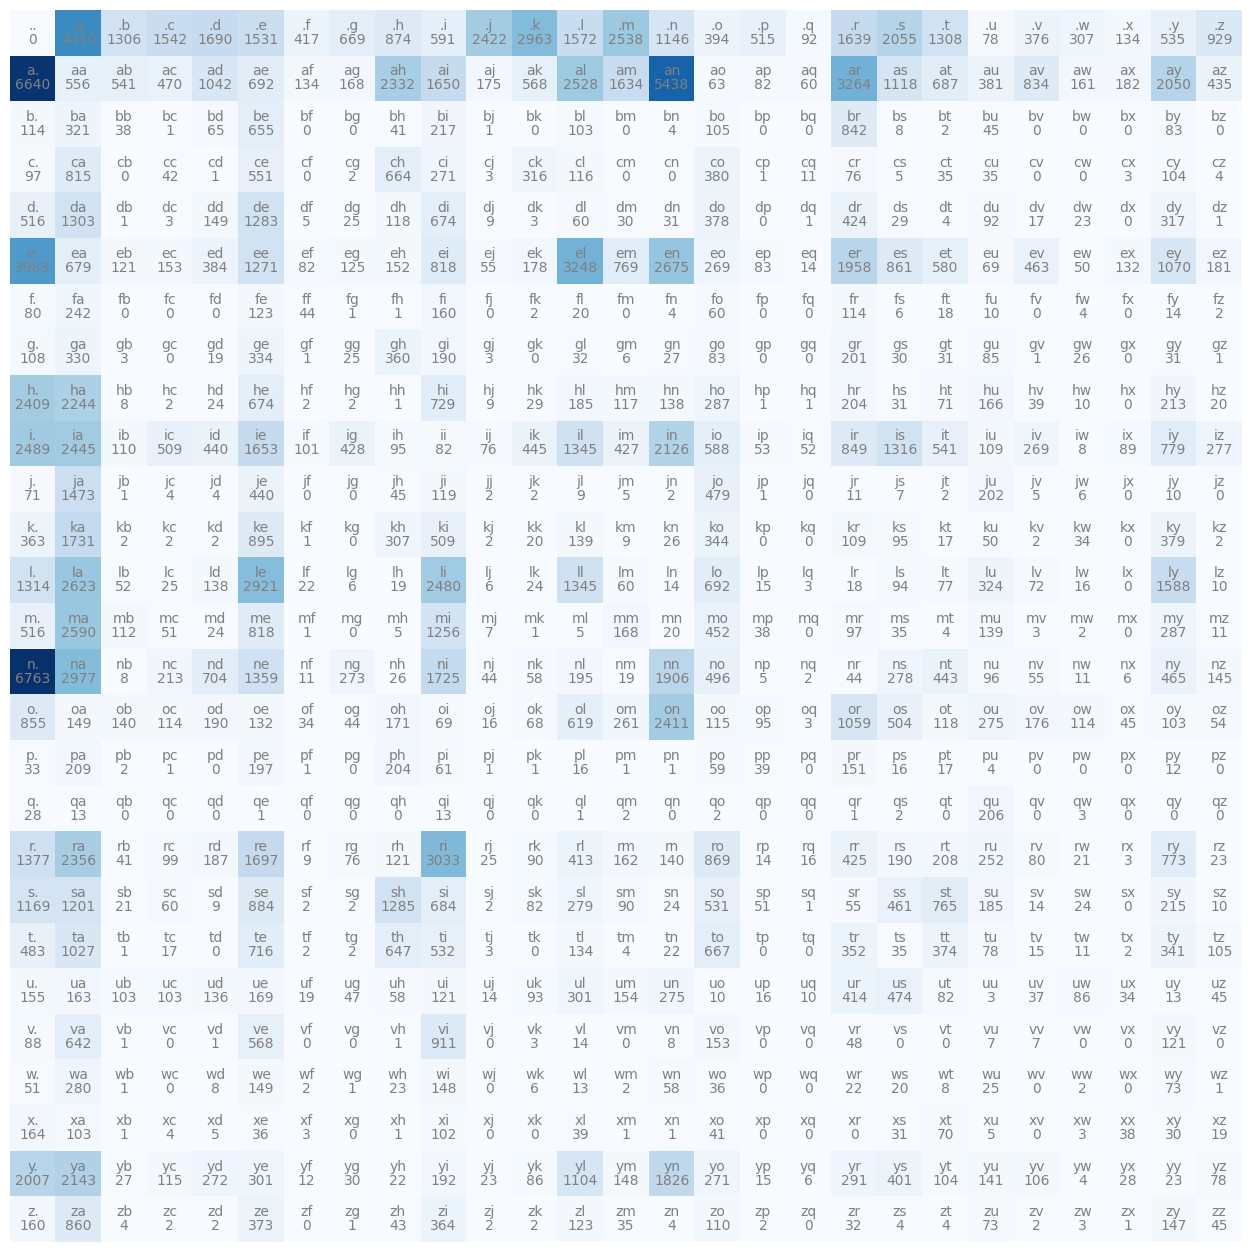

In [93]:
plt.figure(figsize=(16,16))
plt.imshow(model2, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, model2[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [94]:
model2 = model2.float()
model2 = model2/model2.sum(dim=1, keepdim=True)

In [100]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5): #Lets sample 5 names
    curr_char, curr_name = ".", ""

    while True:
        curr_idx = stoi[curr_char]
         
        sample_idx = torch.multinomial(model2[curr_idx], num_samples=1, replacement=True, generator=g).item()
        sample_char = itos[sample_idx]

        if sample_char == ".":
            break
        curr_name += sample_char
        curr_char = sample_char

    print(curr_name)

cexze
momasurailezitynn
konimittain
llayn
ka


In [ ]:
g = torch.Generator().manual_seed(2147483647)

## Completely random model
for i in range(5): #Lets sample 5 names
    curr_char, curr_name = ".", ""

    while True:
        curr_idx = stoi[curr_char]
        
        p = torch.ones(27, dtype=torch.float32) / 27.0
        sample_idx = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
        sample_char = itos[sample_idx]

        if sample_char == ".":
            break
        curr_name += sample_char
        curr_char = sample_char

    print(curr_name)

cexzm
zoglkurkicqzktyhwmvmzimjttainrlkfukzkktda
sfcxvpubjtbhrmgotzx
iczixqctvujkwptedogkkjemkmmsidguenkbvgynywftbspmhwcivgbvtahlvsu
dsdxxblnwglhpyiw


## Step 2:

Implement the NLL loss to find the likelihood the names generated.

Maximimising likelihood == Minimising NLL

In [108]:
model2 = torch.zeros((27, 27), dtype=torch.int32)

for name in names:
    name = ['.'] + list(name) + ['.']

    for ch1, ch2 in zip(name, name[1:]):
        i1, i2 = stoi[ch1], stoi[ch2]
        model2[i1][i2] += 1

## Smoothen the model to avoid 0 probs and hence inf NLL
model2 += 1

In [109]:
model2 = model2/model2.sum(dim=1, keepdim=True)

In [123]:
def calculate_nll(og_name):
    nll, n = 0, 0

    name = ['.'] + list(og_name) + ['.']

    for ch1, ch2 in zip(name, name[1:]):
        i1, i2 = stoi[ch1], stoi[ch2]
        nll += -torch.log(model2[i1][i2]).item()
        n += 1

    nll = nll/n

    return nll

In [126]:
og_name = 'andrej'
nll = calculate_nll(og_name)
print(f"{og_name} has a NLL of: {nll}")

andrej has a NLL of: 3.0367717232022966


In [125]:
og_name = 'soham'
nll = calculate_nll(og_name)
print(f"{og_name} has a NLL of: {nll}")

soham has a NLL of: 2.68718288342158


In [127]:
og_name = 'andrejq'
nll = calculate_nll(og_name)
print(f"{og_name} has a NLL of: {nll}")

andrejq has a NLL of: 3.4834019988775253


In [128]:
og_name = 'emma'
nll = calculate_nll(og_name)
print(f"{og_name} has a NLL of: {nll}")

emma has a NLL of: 2.5143283724784853


In [129]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5): #Lets sample 5 names
    curr_char, curr_name = ".", ""

    while True:
        curr_idx = stoi[curr_char]
         
        sample_idx = torch.multinomial(model2[curr_idx], num_samples=1, replacement=True, generator=g).item()
        sample_char = itos[sample_idx]

        if sample_char == ".":
            break
        curr_name += sample_char
        curr_char = sample_char

    nll = calculate_nll(curr_name)
    print(f"Generated name: {curr_name} has a NLL of: {nll}")

Generated name: cexze has a NLL of: 2.837840517361959
Generated name: momasurailezitynn has a NLL of: 2.5276532736089496
Generated name: konimittain has a NLL of: 2.337087651093801
Generated name: llayn has a NLL of: 2.085407634576162
Generated name: ka has a NLL of: 1.6950159867604573


### Compute avg NLL for the overall dataset for `model2`

In [130]:
len(names)

32033

In [135]:
total_nll, n = 0, 0

for name in names:
    name = ['.'] + list(name) + ['.']

    for ch1, ch2 in zip(name, name[1:]):
        i1, i2 = stoi[ch1], stoi[ch2]
        total_nll += -torch.log(model2[i1][i2]).item()
        n += 1

avg_nll = total_nll/n

print(f"Average NLL of the train dataset for model 2: {avg_nll}")

Average NLL of the train dataset for model 2: 2.454576826578749


# Bigram LM as a NN framework

We cast the probability matrix hardcoded as a learnable param

## Step 1:

Create input and output for our network. Inputs will be one hot encoded vectors

In [136]:
len(names)

32033

In [137]:
stoi, itos

({'.': 0,
  'a': 1,
  'b': 2,
  'c': 3,
  'd': 4,
  'e': 5,
  'f': 6,
  'g': 7,
  'h': 8,
  'i': 9,
  'j': 10,
  'k': 11,
  'l': 12,
  'm': 13,
  'n': 14,
  'o': 15,
  'p': 16,
  'q': 17,
  'r': 18,
  's': 19,
  't': 20,
  'u': 21,
  'v': 22,
  'w': 23,
  'x': 24,
  'y': 25,
  'z': 26},
 {0: '.',
  1: 'a',
  2: 'b',
  3: 'c',
  4: 'd',
  5: 'e',
  6: 'f',
  7: 'g',
  8: 'h',
  9: 'i',
  10: 'j',
  11: 'k',
  12: 'l',
  13: 'm',
  14: 'n',
  15: 'o',
  16: 'p',
  17: 'q',
  18: 'r',
  19: 's',
  20: 't',
  21: 'u',
  22: 'v',
  23: 'w',
  24: 'x',
  25: 'y',
  26: 'z'})

In [141]:
import torch.nn.functional as F

idx1, idx2 = [], []

for name in names[:1]:
    name = ['.'] + list(name) + ['.']
    
    for ch1, ch2 in zip(name, name[1:]):
        i1, i2 = stoi[ch1], stoi[ch2]
        idx1.append(i1)
        idx2.append(i2)

idx1 = torch.Tensor(idx1).long()

idx1, idx2

(tensor([ 0,  5, 13, 13,  1]), [5, 13, 13, 1, 0])

In [147]:
input = F.one_hot(idx1, num_classes=len(stoi)).float().T
output = torch.Tensor(idx2).long()

input.shape, output.shape

(torch.Size([27, 5]), torch.Size([5]))

In [148]:
input[:,1]

tensor([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])

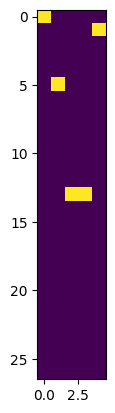

In [190]:
plt.imshow(input)

## Step 2:

Initialize the parameters / weights of the NN

In [173]:
g = torch.Generator().manual_seed(2147483647)
vocab_size = len(stoi)

W = torch.randn((vocab_size, vocab_size), dtype=torch.float32, generator=g); W.requires_grad = True

## Step 3:

Do a forward pass, apply softmax and normalize each column 

In [ ]:
# 27 * 5
#  1 * 5

In [174]:
# matrix mult
logit = W @ input
#exp
exp_logit = torch.exp(logit)
# normalize columns
probs = exp_logit / (exp_logit.sum(dim=0))
# final output --> just take the ones we need
pred = probs[output, range(len(output))]

In [175]:
pred

tensor([0.0237, 0.0305, 0.0217, 0.0079, 0.0213], grad_fn=<IndexBackward0>)

In [172]:
probs[0, 4]

tensor(0.0213)

## Step 4: Compute NLL

In [178]:
nll = -torch.log(pred).mean()
nll

tensor(3.9501, grad_fn=<NegBackward0>)

## Step 5: Call backward and get the gradients

In [179]:
nll.backward()

In [180]:
W.grad.shape

torch.Size([27, 27])

## Step 6: Do the update on the parameters

In [182]:
with torch.no_grad():
    W -= 0.01 * W.grad

## Step 7: Check if NLL actually decreased

In [183]:
# matrix mult
logit = W @ input
#exp
exp_logit = torch.exp(logit)
# normalize columns
probs = exp_logit / (exp_logit.sum(dim=0))
# final output --> just take the ones we need
pred = probs[output, range(len(output))]
nll = -torch.log(pred).mean()
nll

tensor(3.9480, grad_fn=<NegBackward0>)

## Combine all this in a full backprop

In [188]:
g = torch.Generator().manual_seed(2147483647)
vocab_size = len(stoi)

W = torch.randn((vocab_size, vocab_size), dtype=torch.float32, generator=g); W.requires_grad = True

In [189]:
for i in range(50):
    W.grad = None

    logit = W @ input
    exp_logit = torch.exp(logit)
    probs = exp_logit / (exp_logit.sum(dim=0))
    pred = probs[output, range(len(output))]

    nll = -torch.log(pred).mean()
    nll.backward()

    with torch.no_grad():
        W -= 10 * W.grad   

    print(f"Epoch {i+1} NLL: {nll.item()}") 

Epoch 1 NLL: 3.950113296508789
Epoch 2 NLL: 1.9835968017578125
Epoch 3 NLL: 0.8574596643447876
Epoch 4 NLL: 0.5423731207847595
Epoch 5 NLL: 0.44588106870651245
Epoch 6 NLL: 0.4007786810398102
Epoch 7 NLL: 0.3747254014015198
Epoch 8 NLL: 0.3577626347541809
Epoch 9 NLL: 0.3458383083343506
Epoch 10 NLL: 0.3369970917701721
Epoch 11 NLL: 0.3301791548728943
Epoch 12 NLL: 0.3247608542442322
Epoch 13 NLL: 0.3203510046005249
Epoch 14 NLL: 0.3166918158531189
Epoch 15 NLL: 0.31360650062561035
Epoch 16 NLL: 0.31096982955932617
Epoch 17 NLL: 0.3086903691291809
Epoch 18 NLL: 0.3067002296447754
Epoch 19 NLL: 0.30494746565818787
Epoch 20 NLL: 0.30339205265045166
Epoch 21 NLL: 0.3020022511482239
Epoch 22 NLL: 0.30075305700302124
Epoch 23 NLL: 0.29962417483329773
Epoch 24 NLL: 0.29859885573387146
Epoch 25 NLL: 0.29766368865966797
Epoch 26 NLL: 0.29680711030960083
Epoch 27 NLL: 0.29601964354515076
Epoch 28 NLL: 0.29529324173927307
Epoch 29 NLL: 0.29462113976478577
Epoch 30 NLL: 0.29399722814559937
Epoch 

## Now do it for the full dataset

In [194]:
import torch.nn.functional as F

xs, ys, n, vocab_size = [], [], 0, len(stoi)

for name in names:
    name = ['.'] + list(name) + ['.']
    
    for ch1, ch2 in zip(name, name[1:]):
        i1, i2 = stoi[ch1], stoi[ch2]
        xs.append(i1)
        ys.append(i2)
        n += 1

xs = torch.Tensor(xs).long()
ys = torch.Tensor(ys).long()
xenc = F.one_hot(xs, num_classes=vocab_size).float().T

print(f"Total bigrams: {n}")

Total bigrams: 228146


In [195]:
xenc.shape, ys.shape

(torch.Size([27, 228146]), torch.Size([228146]))

In [198]:
g = torch.Generator().manual_seed(2147483647)

W = torch.randn((vocab_size, vocab_size), dtype=torch.float32, generator=g); W.requires_grad = True

In [199]:
for i in range(100):
    W.grad = None

    logit = W @ xenc
    exp_logit = torch.exp(logit)
    probs = exp_logit / (exp_logit.sum(dim=0))
    pred = probs[ys, torch.arange(0, len(ys))]

    nll = -torch.log(pred).mean()
    nll.backward()

    with torch.no_grad():
        W -= 50 * W.grad   

    print(f"Epoch {i+1} NLL: {nll.item()}") 

Epoch 1 NLL: 3.650911331176758
Epoch 2 NLL: 3.301286220550537
Epoch 3 NLL: 3.101592779159546
Epoch 4 NLL: 2.974174737930298
Epoch 5 NLL: 2.8841464519500732
Epoch 6 NLL: 2.8179898262023926
Epoch 7 NLL: 2.7688379287719727
Epoch 8 NLL: 2.731781482696533
Epoch 9 NLL: 2.7031147480010986
Epoch 10 NLL: 2.680234670639038
Epoch 11 NLL: 2.6614303588867188
Epoch 12 NLL: 2.6456005573272705
Epoch 13 NLL: 2.6320221424102783
Epoch 14 NLL: 2.6202008724212646
Epoch 15 NLL: 2.6097893714904785
Epoch 16 NLL: 2.600532293319702
Epoch 17 NLL: 2.592240333557129
Epoch 18 NLL: 2.584765911102295
Epoch 19 NLL: 2.5779924392700195
Epoch 20 NLL: 2.571826219558716
Epoch 21 NLL: 2.566190004348755
Epoch 22 NLL: 2.5610194206237793
Epoch 23 NLL: 2.556260347366333
Epoch 24 NLL: 2.5518672466278076
Epoch 25 NLL: 2.547800302505493
Epoch 26 NLL: 2.544025421142578
Epoch 27 NLL: 2.540513753890991
Epoch 28 NLL: 2.5372393131256104
Epoch 29 NLL: 2.534179210662842
Epoch 30 NLL: 2.5313148498535156
Epoch 31 NLL: 2.5286288261413574
Ep

In [200]:
nll.item()

2.473668336868286

In [201]:
total_nll, n = 0, 0

for name in names:
    name = ['.'] + list(name) + ['.']

    for ch1, ch2 in zip(name, name[1:]):
        i1, i2 = stoi[ch1], stoi[ch2]
        total_nll += -torch.log(model2[i1][i2]).item()
        n += 1

avg_nll = total_nll/n

print(f"Average NLL of the train dataset for model 2: {avg_nll}")

Average NLL of the train dataset for model 2: 2.454576826578749


## Regularization

In [219]:
g = torch.Generator().manual_seed(2147483647)

W = torch.randn((vocab_size, vocab_size), dtype=torch.float32, generator=g); W.requires_grad = True

In [ ]:
for i in range(100):
    W.grad = None

    logit = W @ xenc
    
    exp_logit = torch.exp(logit)
    probs = exp_logit / (exp_logit.sum(dim=0))
    pred = probs[ys, torch.arange(0, len(ys))]

    nll_reg = -torch.log(pred).mean() + 0.01 * ((W.data)**2).mean() # L2 regularization
    nll_reg.backward()

    with torch.no_grad():
        W -= 50 * W.grad   

    print(f"Epoch {i+1} NLL: {nll_reg.item()}") 

Epoch 1 NLL: 3.660576581954956
Epoch 2 NLL: 3.3101730346679688
Epoch 3 NLL: 3.110175848007202
Epoch 4 NLL: 2.9826483726501465
Epoch 5 NLL: 2.892624616622925
Epoch 6 NLL: 2.8265445232391357
Epoch 7 NLL: 2.7775115966796875
Epoch 8 NLL: 2.7405943870544434
Epoch 9 NLL: 2.712073564529419
Epoch 10 NLL: 2.6893398761749268
Epoch 11 NLL: 2.6706790924072266
Epoch 12 NLL: 2.6549899578094482
Epoch 13 NLL: 2.6415486335754395
Epoch 14 NLL: 2.629861831665039
Epoch 15 NLL: 2.619582414627075
Epoch 16 NLL: 2.61045503616333
Epoch 17 NLL: 2.6022908687591553
Epoch 18 NLL: 2.594942331314087
Epoch 19 NLL: 2.5882930755615234
Epoch 20 NLL: 2.582249641418457
Epoch 21 NLL: 2.5767343044281006
Epoch 22 NLL: 2.571683406829834
Epoch 23 NLL: 2.567042350769043
Epoch 24 NLL: 2.5627660751342773
Epoch 25 NLL: 2.558814525604248
Epoch 26 NLL: 2.5551533699035645
Epoch 27 NLL: 2.5517544746398926
Epoch 28 NLL: 2.548591375350952
Epoch 29 NLL: 2.5456411838531494
Epoch 30 NLL: 2.5428855419158936
Epoch 31 NLL: 2.54030704498291
Ep

## Sampling from this

We get exact same answers since the same model + sampling method.
Just the "training" is in two different ways !!

In [234]:
g = torch.Generator().manual_seed(2147483647)

for i in range(5): #Lets sample 5 names
    curr_char, curr_name = ".", ""

    while True:
        # get the idx and make it a one-hot
        curr_idx = torch.Tensor([stoi[curr_char]]).long()
        curr_idx_one_hot = F.one_hot(curr_idx, num_classes=vocab_size).T.float()

        # Get logits, exp, normalize to get the dist
        logits = (W.data) @ curr_idx_one_hot
        exp_logits = torch.exp(logits)
        prob_dist = (exp_logits / exp_logits.sum(dim = 0)).squeeze()
        
        # Sample from this
        sample_idx = torch.multinomial(prob_dist, num_samples=1, replacement=True, generator=g).item()
        sample_char = itos[sample_idx]

        if sample_char == ".":
            break
        curr_name += sample_char
        curr_char = sample_char

    print(curr_name)

cexze
momasurailezityha
konimittain
llayn
ka
